In [48]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

In [49]:
val = np.random.random()

# Q1 Figure 2.5

## (i) Sample Average

In [50]:
RUNS = 2000
STEPS = 10000
ACTIONS = 10
avg = np.zeros(STEPS)
# optimalavg = np.zeros(STEPS)
optimal_per_step = np.zeros(STEPS)


for run in tqdm(range(1,RUNS+1)):
    q = np.zeros(ACTIONS)
    rewards = np.zeros(STEPS)
    n_a = np.ones(ACTIONS)
    optimal_percentage = 0
    actionvals = np.full(ACTIONS,val)
    optimals = []
    for step in range(STEPS):
        option = 0
        selection = np.random.uniform(0,1)
        if(selection<.1):
            option=1
        action = 0
        if(option==0):
            action = np.argmax(q)  #Exploit
        else:
            action = np.random.randint(ACTIONS)  #Explore
        
        reward = np.random.normal(actionvals[action],1)
        
        q[action] = q[action] + 1/n_a[action]*(reward - q[action])      #action value method
        n_a[action]+=1
        actionvals = actionvals + np.random.normal(0,.01,ACTIONS)
        rewards[step] = reward
        optimal = np.argmax(actionvals)
        

        
        if(optimal == action):
            optimal_per_step[step]+=1
        
    avg += rewards

sample_average = avg/RUNS
# optimal_percentage1 = optimalavg/RUNS
optimal_per_step_sa = optimal_per_step/RUNS

## (ii) Constant step size

In [51]:
RUNS = 2000
STEPS = 10000
ACTIONS = 10
avg = np.zeros(STEPS)
optimalavg = np.zeros(STEPS)
optimal_per_step = np.zeros(STEPS)


for run in tqdm(range(1,RUNS+1)):
    q = np.zeros(ACTIONS)
    rewards = np.zeros(STEPS)
    n_a = np.ones(ACTIONS)
    optimal_percentage = 0
    actionvals = np.full(ACTIONS,val)
    optimals = []
    for step in range(STEPS):
        option = 0
        selection = np.random.uniform(0,1)
        if(selection<.1):
            option=1
        action = 0
        if(option==0):
            action = np.argmax(q)  #Exploit
        else:
            action = np.random.randint(ACTIONS)  #Explore
        
        reward = np.random.normal(actionvals[action],1)
        
        q[action] = q[action] + .1*(reward - q[action])      #action value method
        n_a[action]+=1
        actionvals = actionvals + np.random.normal(0,.01,ACTIONS)
        rewards[step] = reward
        optimal = np.argmax(actionvals)
        
        if(optimal == action):
            optimal_per_step[step]+=1
            
    avg += rewards
#     optimals=np.array(optimals)
#     optimalavg+=optimals
weighted_average = avg/RUNS
# optimal_percentage2 = optimalavg/RUNS
optimal_per_constant_step = optimal_per_step/RUNS

## Average Reward vs Steps Plot

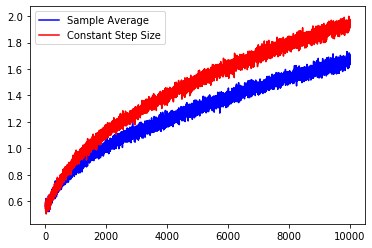

In [54]:
plt.plot(sample_average,color = 'b', label = 'Sample Average' )
plt.plot(weighted_average,color='r',label = 'Constant Step Size')
plt.legend()

## Optimal Action Percentage vs Steps Plot

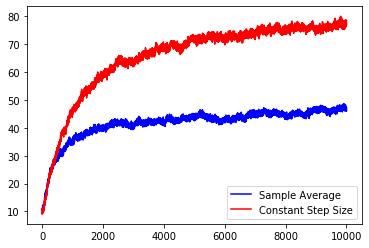

In [55]:
plt.plot(optimal_per_step_sa*100,color = 'b' ,label = 'Sample Average')
plt.plot(optimal_per_constant_step*100,color='r',label = 'Constant Step Size')
plt.legend()

# Q2

## (i) Figure 2.3 for stationary

### (a) Optimistic Initial Value with greedy approach

In [95]:
RUNS = 2000
STEPS = 2000
ACTIONS = 10
avg = np.zeros(STEPS)
optimalavg = np.zeros(STEPS)
actionvals = np.random.normal(0,1,ACTIONS)
optimal_per_step=np.zeros(STEPS)

for run in tqdm(range(1,RUNS+1)):
    q = np.zeros(ACTIONS) + 10
    rewards = np.zeros(STEPS)
    n_a = np.ones(ACTIONS)
    optimal_percentage = 0
    
    optimals = []
    for step in range(STEPS):
        option = 0
        selection = np.random.uniform(0,1)
        
        action = np.argmax(q)  #Exploit

        reward = np.random.normal(actionvals[action],1)
        
        q[action] = q[action] + .1*(reward - q[action])      #action value method
        n_a[action]+=1

        rewards[step] = reward
        optimal = np.argmax(actionvals)
        if(optimal == action):
            optimal_per_step[step]+=1

    avg += rewards
optimistic_greedy_reward = avg/RUNS
optimistic_greedy_per = optimal_per_step/RUNS

### (b) Epsilon greedy approach

In [96]:
RUNS = 2000
STEPS = 2000
ACTIONS = 10
EPSILON = .1
avg = np.zeros(STEPS)
optimalavg = np.zeros(STEPS)
actionvals = np.random.normal(0,1,ACTIONS)
optimal_per_step = np.zeros(STEPS)

for run in tqdm(range(1,RUNS+1)):
    q = np.zeros(ACTIONS)
    rewards = np.zeros(STEPS)
    n_a = np.ones(ACTIONS)
    optimal_percentage = 0
    
    optimals = []
    for step in range(STEPS):
        option = 0
        selection = np.random.uniform(0,1)
        if(selection<EPSILON):
            option=1
        action = 0
        if(option==0):
            action = np.argmax(q)  #Exploit
        else:
            action = np.random.randint(ACTIONS)  #Explore
        
        reward = np.random.normal(actionvals[action],1)
        
        q[action] = q[action] + .1*(reward - q[action])      #action value method
        n_a[action]+=1
        rewards[step] = reward
        
        optimal = np.argmax(actionvals)
        if(optimal == action):
            optimal_per_step[step]+=1
            

    avg += rewards
eps_greedy_reward = avg/RUNS
eps_greedy_per = optimal_per_step/RUNS

### Optimal Action percentage vs Steps plot

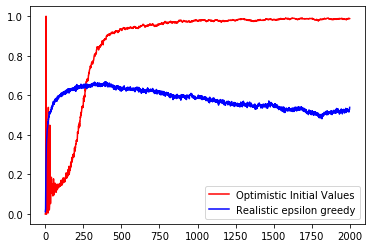

In [98]:
plt.plot(optimistic_greedy_per,color='r',label = 'Optimistic Initial Values')
plt.plot(eps_greedy_per,color='b',label = 'Realistic epsilon greedy')
plt.legend()

## (ii) Figure 2.3 for non-stationary case

### (a) Optimistic Initial Value with greedy approach

In [71]:
RUNS = 2000
STEPS = 10000
ACTIONS = 10
avg = np.zeros(STEPS)
optimalavg = np.zeros(STEPS)
optimal_per_step = np.zeros(STEPS)

for run in tqdm(range(1,RUNS+1)):
    q = np.zeros(ACTIONS) + 10
    rewards = np.zeros(STEPS)
    n_a = np.ones(ACTIONS)
    optimal_percentage = 0
    actionvals = np.full(ACTIONS,val)
    
    optimals = []
    for step in range(STEPS):
        option = 0
        selection = np.random.uniform(0,1)
        
        action = np.argmax(q)  #Exploit

        reward = np.random.normal(actionvals[action],1)
        
        q[action] = q[action] + .1*(reward - q[action])      #action value method
        n_a[action]+=1
        actionvals = actionvals + np.random.normal(0,.01,ACTIONS)
        rewards[step] = reward
        
        optimal = np.argmax(actionvals)
        if(optimal == action):
            optimal_per_step[step]+=1
            
    avg += rewards
    
optimistic_greedy_nonst = optimal_per_step/RUNS

### (b) epsilon greedy approach

In [84]:
RUNS = 2000
STEPS = 10000
ACTIONS = 10
EPSILON = .1
avg = np.zeros(STEPS)
optimalavg = np.zeros(STEPS)
optimal_per_step = np.zeros(STEPS)


for run in tqdm(range(1,RUNS+1)):
    q = np.zeros(ACTIONS)
    rewards = np.zeros(STEPS)
    n_a = np.ones(ACTIONS)
    optimal_percentage = 0
    
    optimals = []
    for step in range(STEPS):
        option = 0
        selection = np.random.uniform(0,1)
        
        action = np.argmax(q)
        
        if(selection<EPSILON):
            option=1
        action = 0
        if(option==0):
            action = np.argmax(q)  #Exploit
        else:
            action = np.random.randint(ACTIONS)  #Explore

        reward = np.random.normal(actionvals[action],1)
        
        q[action] = q[action] + .1*(reward - q[action])      #action value method
        n_a[action]+=1
        actionvals = actionvals + np.random.normal(0,.01,ACTIONS)
        rewards[step] = reward
        
        optimal = np.argmax(actionvals)
        if(optimal == action):
            optimal_per_step[step]+=1
        
    avg += rewards

eps_greedy_nonst = optimal_per_step/RUNS

### Optimal Action Percentage vs Steps plot

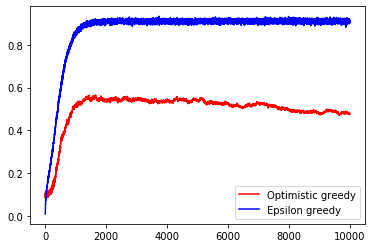

In [85]:
plt.plot(optimistic_greedy_nonst,color='r',label='Optimistic greedy')
plt.plot(eps_greedy_nonst,color='b',label = 'Epsilon greedy')
plt.legend()

# Q4 

## a) Stationary case

### (i) Action Selection using UCB

In [132]:
actionvals = np.random.normal(0,1,ACTIONS)

In [133]:
RUNS = 2000
STEPS = 1000
ACTIONS = 10
avg = np.zeros(STEPS)
optimalavg = np.zeros(STEPS)
# actionvals = np.random.normal(0,1,ACTIONS)
optimal_per_step = np.zeros(STEPS)

for run in tqdm(range(1,RUNS+1)):
    q = np.zeros(ACTIONS)
    rewards = np.zeros(STEPS)
    n_a = np.ones(ACTIONS)
    optimal_percentage = 0
    
    optimals = []
    for step in range(STEPS):
        option = 0
        selection = np.random.uniform(0,1)
        
        action = np.argmax(q + 2*np.sqrt(np.log(step+1)/n_a))  #UCB with C=2

        reward = np.random.normal(actionvals[action],1)
        
        q[action] = q[action] + .1*(reward - q[action])      
        n_a[action]+=1
        rewards[step] = reward
        
        optimal = np.argmax(actionvals)
        if(optimal == action):
            optimal_per_step[step]+=1
            
    avg += rewards
ucb_avg_reward = avg/RUNS
ucb_optimal_percentage  = optimal_per_step/RUNS

### (ii) Epsilon greedy

In [134]:
RUNS = 2000
STEPS = 1000
ACTIONS = 10
EPSILON = .1
avg = np.zeros(STEPS)
optimalavg = np.zeros(STEPS)
# actionvals = np.random.normal(0,1,ACTIONS)
optimal_per_step = np.zeros(STEPS)

for run in tqdm(range(1,RUNS+1)):
    q = np.zeros(ACTIONS)
    rewards = np.zeros(STEPS)
    n_a = np.ones(ACTIONS)
    optimal_percentage = 0
    
    optimals = []
    for step in range(STEPS):
        option = 0
        selection = np.random.uniform(0,1)
        if(selection<EPSILON):
            option=1
        action = 0
        if(option==0):
            action = np.argmax(q)  #Exploit
        else:
            action = np.random.randint(ACTIONS)  #Explore
        
        reward = np.random.normal(actionvals[action],1)
        
        q[action] = q[action] + .1*(reward - q[action])      #action value method
        n_a[action]+=1
        rewards[step] = reward
        
        optimal = np.argmax(actionvals)
        if(optimal == action):
            optimal_per_step[step]+=1
            

    avg += rewards
eps_greedy_reward = avg/RUNS
eps_greedy_per = optimal_per_step/RUNS

### (iii) Optimistic greedy

In [135]:
RUNS = 2000
STEPS = 1000
ACTIONS = 10
avg = np.zeros(STEPS)
optimalavg = np.zeros(STEPS)
# actionvals = np.random.normal(0,1,ACTIONS)
optimal_per_step=np.zeros(STEPS)

for run in tqdm(range(1,RUNS+1)):
    q = np.zeros(ACTIONS) + 10
    rewards = np.zeros(STEPS)
    n_a = np.ones(ACTIONS)
    optimal_percentage = 0
    
    optimals = []
    for step in range(STEPS):
        option = 0
        selection = np.random.uniform(0,1)
        
        action = np.argmax(q)  #Exploit

        reward = np.random.normal(actionvals[action],1)
        
        q[action] = q[action] + .1*(reward - q[action])      #action value method
        n_a[action]+=1

        rewards[step] = reward
        optimal = np.argmax(actionvals)
        if(optimal == action):
            optimal_per_step[step]+=1

    avg += rewards
optimistic_greedy_reward = avg/RUNS
optimistic_greedy_per = optimal_per_step/RUNS

### Average reward vs Steps for above 3 approaches

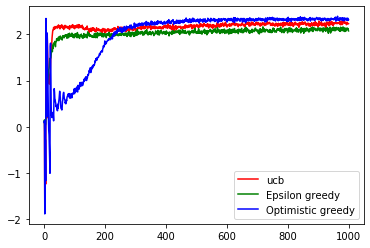

In [136]:
plt.plot(ucb_avg_reward,color='r',label = 'ucb')
plt.plot(eps_greedy_reward,color='g',label = 'Epsilon greedy')
plt.plot(optimistic_greedy_reward,color='b',label='Optimistic greedy')
plt.legend()

## b) Non stationary

### (i) Action selection using UCB

In [149]:
RUNS = 2000
STEPS = 1000
ACTIONS = 10

avg = np.zeros(STEPS)
optimalavg = np.zeros(STEPS)

# actionvals = np.random.normal(0,1,ACTIONS)

for run in tqdm(range(1,RUNS+1)):
    q = np.zeros(ACTIONS)
    rewards = np.zeros(STEPS)
    n_a = np.ones(ACTIONS)
    optimal_percentage = 0
    actionvals = np.full(ACTIONS,val)
    optimals = []
    for step in range(STEPS):
        option = 0
        selection = np.random.uniform(0,1)
        
        action = np.argmax(q + 2*np.sqrt(np.log(step+1)/n_a))  #UCB with C=2

        reward = np.random.normal(actionvals[action],1)
        
        actionvals = actionvals + np.random.normal(0,.01,ACTIONS)
        
        q[action] = q[action] + .1*(reward - q[action])      
        n_a[action]+=1
        rewards[step] = reward
        
        optimal = np.argmax(actionvals)
        optimal_percentage += (1 / (step + 1)) * ((1 if action == optimal else 0) - optimal_percentage)
        optimals.append(optimal_percentage)
    
    avg += rewards
    optimals=np.array(optimals)
    optimalavg+=optimals
ucb_reward_nonst = avg/RUNS
ucb_per_nonst  = optimalavg/RUNS

### (ii) Optimistic greedy

In [150]:
RUNS = 2000
STEPS = 1000
ACTIONS = 10
avg = np.zeros(STEPS)
optimalavg = np.zeros(STEPS)
optimal_per_step = np.zeros(STEPS)

for run in tqdm(range(1,RUNS+1)):
    q = np.zeros(ACTIONS) + 10
    rewards = np.zeros(STEPS)
    n_a = np.ones(ACTIONS)
    optimal_percentage = 0
    actionvals = np.full(ACTIONS,val)
    
    optimals = []
    for step in range(STEPS):
        option = 0
        selection = np.random.uniform(0,1)
        
        action = np.argmax(q)  #Exploit

        reward = np.random.normal(actionvals[action],1)
        
        q[action] = q[action] + .1*(reward - q[action])      #action value method
        n_a[action]+=1
        actionvals = actionvals + np.random.normal(0,.01,ACTIONS)
        rewards[step] = reward
        
        optimal = np.argmax(actionvals)
        if(optimal == action):
            optimal_per_step[step]+=1
            
    avg += rewards
    
optimistic_greedy_reward_nonst = avg/RUNS
optimistic_greedy_per_nonst = optimal_per_step/RUNS

### (iii) Epsilon greedy

In [151]:
RUNS = 2000
STEPS = 1000
ACTIONS = 10
EPSILON = .1
avg = np.zeros(STEPS)
optimalavg = np.zeros(STEPS)
optimal_per_step = np.zeros(STEPS)


for run in tqdm(range(1,RUNS+1)):
    q = np.zeros(ACTIONS)
    rewards = np.zeros(STEPS)
    n_a = np.ones(ACTIONS)
    optimal_percentage = 0
    actionvals = np.full(ACTIONS,val)
    
    
    optimals = []
    for step in range(STEPS):
        option = 0
        selection = np.random.uniform(0,1)
        
        action = np.argmax(q)
        
        if(selection<EPSILON):
            option=1
        action = 0
        if(option==0):
            action = np.argmax(q)  #Exploit
        else:
            action = np.random.randint(ACTIONS)  #Explore

        reward = np.random.normal(actionvals[action],1)
        
        q[action] = q[action] + .1*(reward - q[action])      #action value method
        n_a[action]+=1
        actionvals = actionvals + np.random.normal(0,.01,ACTIONS)
        rewards[step] = reward
        
        optimal = np.argmax(actionvals)
        if(optimal == action):
            optimal_per_step[step]+=1
        
    avg += rewards

eps_greedy_rew_nonst = avg/RUNS
eps_greedy_per_nonst = optimal_per_step/RUNS

### Average reward plot vs steps for the above 3 approaches

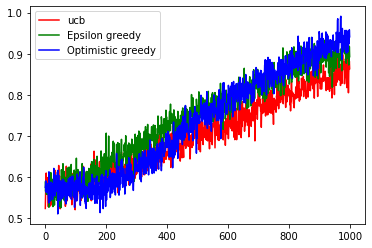

In [152]:
plt.plot(ucb_reward_nonst,color='r',label = 'ucb')
plt.plot(eps_greedy_rew_nonst,color='g',label = 'Epsilon greedy')
plt.plot(optimistic_greedy_reward_nonst,color='b',label='Optimistic greedy')
plt.legend()